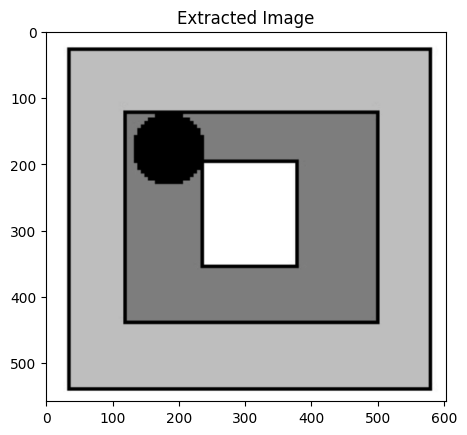

In [44]:
import cv2
import matplotlib.pyplot as plt

# Path to the extracted image
image_path = '/home/vikram/Aule_space/Satellite_port.png'  # Replace with your actual image filename

# Read the image using OpenCV
image = cv2.imread(image_path)

# Convert the image from BGR (OpenCV default) to RGB for visualization
# image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# 
# Display the image using Matplotlib
plt.imshow(image)
plt.axis('on')  # Turn off axis labels
plt.title('Extracted Image')
plt.show()


[[[184.5 177.5  54.8]]]
(np.uint16(184), np.uint16(178))


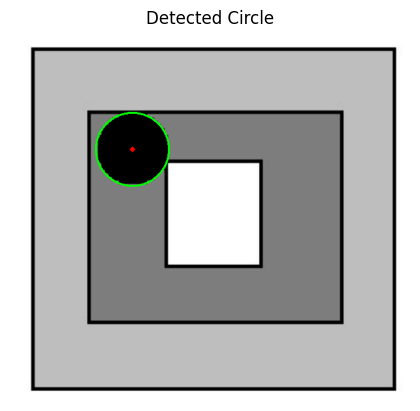

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the extracted image
image_path = '/home/vikram/Aule_space/Satellite_port.png'  # Replace with your actual image filename

# Read the image in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was successfully loaded
if image is None:
    print(f"Error: Could not load the image at {image_path}")
    exit()

# Apply a median blur to reduce noise
blurred_image = cv2.medianBlur(image, 5)

# Detect circles using Hough Circle Transform
circles = cv2.HoughCircles(
    blurred_image,              # Input image
    cv2.HOUGH_GRADIENT,         # Detection method
    dp=1,                       # Inverse ratio of accumulator resolution to image resolution
    minDist=100,                 # Minimum distance between circle centers
    param1=50,                  # Higher threshold for Canny edge detection
    param2=10,                  # Threshold for center detection
    minRadius=40,                # Minimum radius of circles
    maxRadius=70                 # Maximum radius of circles
)

# Check if any circles were detected
if circles is not None:
    # Convert circle parameters to integers
    print(circles)
    circles = np.uint16(np.around(circles))

    # Convert grayscale image to BGR for visualization
    output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    # Draw the detected circles
    for circle in circles[0, :]:
        center = (circle[0], circle[1])  # Circle center (x, y)
        radius = circle[2]              # Circle radius
        print(center)

        # Draw the circle's outline
        cv2.circle(output_image, center, radius, (0, 255, 0), 2)  # Green outline
        # Draw the circle's center
        cv2.circle(output_image, center, 2, (0, 0, 255), 3)      # Red dot at the center

    # Display the result using Matplotlib
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Detected Circle')
    plt.show()

else:
    print("No circles were detected.")


Circle center: (np.uint16(184), np.uint16(178))
Detected rotation angle: 44.05043029785156 degrees


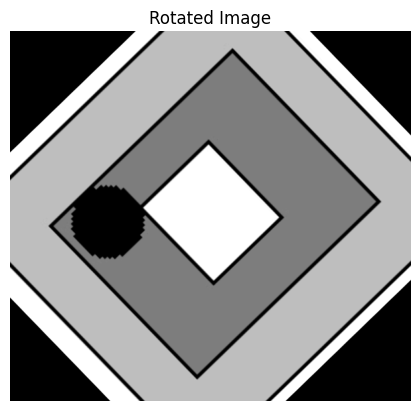

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the extracted image
image_path = '/home/vikram/Aule_space/Satellite_port.png'  # Replace with your actual image filename

# Read the image in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was successfully loaded
if image is None:
    print(f"Error: Could not load the image at {image_path}")
    exit()

# Apply a median blur to reduce noise
blurred_image = cv2.medianBlur(image, 5)

# Detect circles using Hough Circle Transform
circles = cv2.HoughCircles(
    blurred_image,              # Input image
    cv2.HOUGH_GRADIENT,         # Detection method
    dp=1,                       # Inverse ratio of accumulator resolution to image resolution
    minDist=100,                 # Minimum distance between circle centers
    param1=50,                  # Higher threshold for Canny edge detection
    param2=10,                  # Threshold for center detection
    minRadius=40,               # Minimum radius of circles
    maxRadius=70                # Maximum radius of circles
)

# Check if any circles were detected
if circles is not None:
    # Convert circle parameters to integers
    circles = np.uint16(np.around(circles))

    # Get the center of the first detected circle
    center = (circles[0, 0][0], circles[0, 0][1])  # Circle center (x, y)
    print("Circle center:", center)

    # Calculate the angle of rotation based on the position of the detected circle
    # We will assume the circle is at the top-left corner and calculate the angle
    # Reference point (assuming circle is at the top-left with respect to image orientation)
    reference_point = (0, 0)  # Top-left corner as the reference

    # Calculate the angle between the reference point and the circle center
    delta_x = center[0] - reference_point[0]
    delta_y = center[1] - reference_point[1]
    angle = np.arctan2(delta_y, delta_x)  # Angle in radians
    angle_deg = np.degrees(angle)  # Convert to degrees

    # Output the calculated angle of rotation
    print(f"Detected rotation angle: {angle_deg} degrees")

    # Rotate the image by the detected angle to correct the orientation
    # Calculate the rotation matrix
    (height, width) = image.shape
    center_of_image = (width // 2, height // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center_of_image, angle_deg, 1)

    # Perform the rotation
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

    # Display the rotated image
    plt.imshow(rotated_image, cmap='gray')
    plt.axis('off')
    plt.title('Rotated Image')
    plt.show()

else:
    print("No circles were detected.")


In [47]:
def calculate_angle(line1, line2):
    """
    Calculate the angle between two lines.
    
    Args:
        line1: Tuple of points defining the first line (x1, y1, x2, y2).
        line2: Tuple of points defining the second line (x3, y3, x4, y4).
        
    Returns:
        angle_deg: Angle between the two lines in degrees.
    """
    # Extract points from the lines
    x1, y1, x2, y2 = line1
    x3, y3, x4, y4 = line2
    
    # Compute direction vectors
    u = np.array([x2 - x1, y2 - y1])  # Vector for line1
    v = np.array([x4 - x3, y4 - y3])  # Vector for line2
    
    # Calculate the dot product and magnitudes
    dot_product = np.dot(u, v)
    magnitude_u = np.linalg.norm(u)
    magnitude_v = np.linalg.norm(v)
    
    # Calculate the cosine of the angle
    cos_theta = dot_product / (magnitude_u * magnitude_v)
    
    # Ensure the value is in the range [-1, 1] to avoid numerical errors
    cos_theta = np.clip(cos_theta, -1.0, 1.0)
    
    # Calculate the angle in radians and then convert to degrees
    angle_rad = np.arccos(cos_theta)
    angle_deg = np.degrees(angle_rad)
    
    return angle_deg

Detected circle center: (184, 178)
Detected circle Radius: 55
Image center: (302, 279)
teest -118
-118 -101
Detected rotation angle: 139.44 degrees


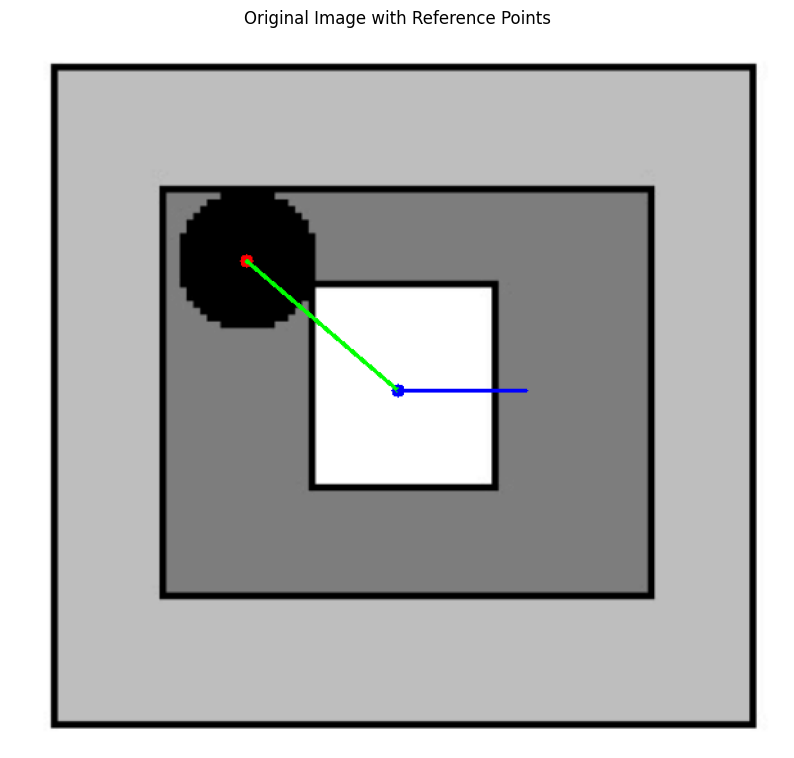

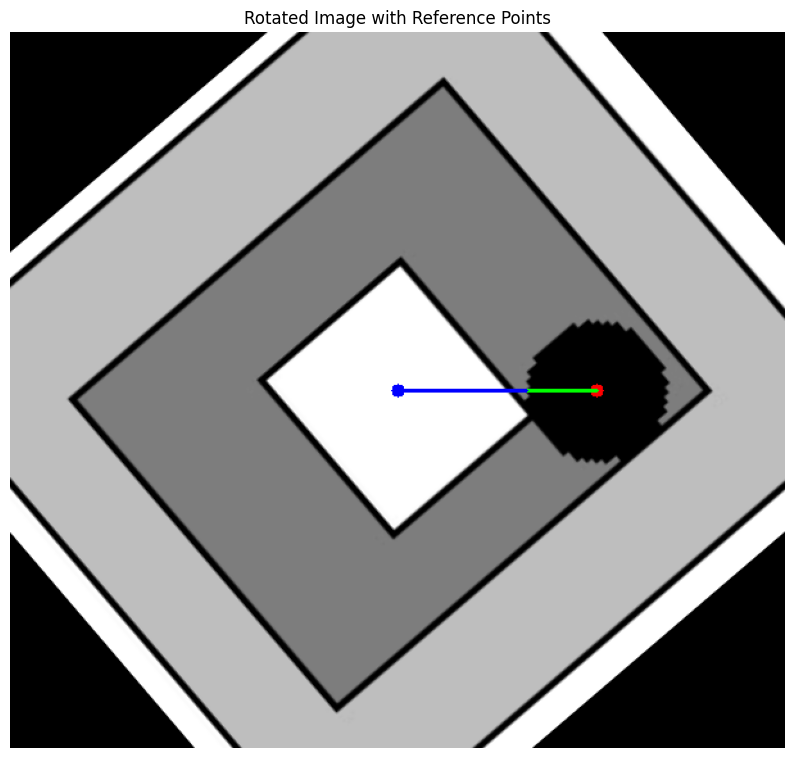

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the extracted image
image_path = '/home/vikram/Aule_space/Satellite_port.png'  # Replace with your actual image filename

# Read the image in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was successfully loaded
if image is None:
    print(f"Error: Could not load the image at {image_path}")
    exit()

# Apply a median blur to reduce noise
blurred_image = cv2.medianBlur(image, 5)



# Detect circles using Hough Circle Transform
circles = cv2.HoughCircles(
    blurred_image,              # Input image
    cv2.HOUGH_GRADIENT,         # Detection method
    dp=1,                       # Inverse ratio of accumulator resolution to image resolution
    minDist=100,                # Minimum distance between circle centers
    param1=50,                  # Higher threshold for Canny edge detection
    param2=10,                  # Threshold for center detection
    minRadius=40,               # Minimum radius of circles
    maxRadius=70                # Maximum radius of circles
)



# Check if any circles were detected
if circles is not None:
    # Convert circle parameters to integers
    circles = np.uint32(np.around(circles))



    # Get the center of the first detected circle
    circle_center = (int(circles[0, 0][0]), int(circles[0, 0][1]))  # Circle center (x, y)
    print("Detected circle center:", circle_center)
    print("Detected circle Radius:", circles[0, 0][2])



    # Get the center of the image (reference point)
    (height, width) = image.shape
    image_center = (width // 2, height // 2)
    print("Image center:", image_center)



    # Calculate the angle between the reference axis and the circle center
    delta_x = circle_center[0] - image_center[0]
    delta_y = circle_center[1] - image_center[1]
    print("teest",circle_center[0] - image_center[0])
    print(delta_x, delta_y)
    angle = np.arctan2(-delta_y, delta_x)  # Angle in radians
    angle_deg = np.degrees(angle)  # Convert to degrees
    if angle_deg < 0:
        angle_deg += 360
    print(f"Detected rotation angle: {angle_deg:.2f} degrees")



    # Visualize the detected reference axis, circle, and line
    color_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    original_image_without_lines = color_image.copy()
    # Draw the circle
    cv2.circle(color_image, circle_center, 5, (0, 0, 255), -1)  # Red dot
    # # Draw the center of the image
    cv2.circle(color_image, image_center, 5, (255, 0, 0), -1)  # Blue dot
    # # Draw the line from the image center to the circle center
    cv2.line(color_image, image_center, circle_center, (0, 255, 0), 2)  # Green line
    # # Draw the positive X-axis (reference axis)
    cv2.line(color_image, image_center, (image_center[0] + 100, image_center[1]), (255, 0, 0), 2)  # Blue line



    # line1=(image_center[0],image_center[1], image_center[0]+100, image_center[1])
    # line2=(image_center[0],image_center[1], circle_center[0], circle_center[1])

    # x = calculate_angle(line1,line2)
    # print("Calculated angle",x)




    # Display the image with visualizations
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Original Image with Reference Points')
    plt.show()



    # Rotate the image by the detected angle
    rotation_matrix = cv2.getRotationMatrix2D(image_center, -angle_deg, 1)
    
    rotated_image = cv2.warpAffine(original_image_without_lines, rotation_matrix, (width, height))



    # Visualize the rotated image with reference axis and lines
    # Rotate the circle center's position
    circle_center_rotated = np.dot(rotation_matrix[:, :2], np.array([circle_center[0], circle_center[1]]) - image_center) + image_center
    circle_center_rotated = tuple(map(int, circle_center_rotated))

    # Draw the rotated lines and reference points
    cv2.circle(rotated_image, image_center, 5, (255, 0, 0), -1)  # Blue dot (image center)
    cv2.circle(rotated_image, circle_center_rotated, 5, (0, 0, 255), -1)  # Red dot (rotated circle center)
    cv2.line(rotated_image, image_center, circle_center_rotated, (0, 255, 0), 2)  # Green line
    cv2.line(rotated_image, image_center, (image_center[0] + 100, image_center[1]), (255, 0, 0), 2)  # Blue reference axis

    # Display the rotated image

    # cv2.imshow("Extracted image", rotated_image)
    # while True:
    #     key = cv2.waitKey(1) & 0xFF  # Wait for a key press
    #     if key == ord('q'):          # Check if 'q' key was pressed
    #         break

    # # Close all OpenCV windows
    # cv2.destroyAllWindows()

    # cv2.imshow()
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Rotated Image with Reference Points')
    plt.show()

else:
    print("No circles were detected.")


In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def create_cropped_image(image_path, crop_x, crop_y, crop_width, crop_height, save_path):
    """
    Crop a part of the image and save it.
    """
    # Load the original image
    image = cv2.imread(image_path)

    if image is None:
        print("Error loading image. Please check the path.")
        return

    # Crop the image
    cropped_image = image[crop_y:crop_y + crop_height, crop_x:crop_x + crop_width]

    # Save the cropped image
    cv2.imwrite(save_path, cropped_image)
    print(f"Cropped image saved at: {save_path}")



# Paths
image_path = '/home/vikram/Aule_space/Satellite_port.png'
cropped_image_path = '/home/vikram/Aule_space/Cropped_circle_image1.png'

# Define crop parameters (example values)
crop_x = 124  # Start x-coordinate
crop_y = 108  # Start y-coordinate
crop_width = 150  # Width of the cropped area
crop_height = 150  # Height of the cropped area

# Create cropped image
create_cropped_image(image_path, crop_x, crop_y, crop_width, crop_height, cropped_image_path)


Cropped image saved at: /home/vikram/Aule_space/Cropped_circle_image1.png


In [50]:
import cv2
import numpy as np

def find_initial_position(reference_image_path, cropped_image_path):
    # Load images
    ref_image = cv2.imread(reference_image_path, cv2.IMREAD_COLOR)
    cropped_image = cv2.imread(cropped_image_path, cv2.IMREAD_COLOR)

    # Perform template matching
    result = cv2.matchTemplate(ref_image, cropped_image, cv2.TM_CCOEFF_NORMED)
    _, _, _, max_loc = cv2.minMaxLoc(result)  # Get the location of the best match
    top_left = max_loc  # Top-left corner of the matching region
    (height,width,_)=cropped_image.shape
    return (top_left,height,width)

reference_image_path = '/home/vikram/Aule_space/Satellite_port.png'
cropped_image_path = '/home/vikram/Aule_space/Cropped1_image.png'

initial_position = find_initial_position(reference_image_path, cropped_image_path)
print(f"Initial top left position of cropped image in reference: {initial_position[0]}")
print(f"Height and width of cropped image respectively: {initial_position[1]} {initial_position[2]}")






def is_circle_visible(image_path, dp=1, min_dist=30, param1=50, param2=10, min_radius=40, max_radius=70):
    """
    Check if a circle is visible in the given image using Hough Circle Transform.
    """
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred_image = cv2.medianBlur(image, 5)


    # Detect circles
    circles = cv2.HoughCircles(
        blurred_image,
        cv2.HOUGH_GRADIENT,
        dp=dp,
        minDist=min_dist,
        param1=param1,
        param2=param2,
        minRadius=min_radius,
        maxRadius=max_radius
    )

    if circles is not None:
        return True, circles
    else:
        return False, None

circle_visible, circles = is_circle_visible(cropped_image_path)
print(f"Circle visible: {circle_visible}")



Initial top left position of cropped image in reference: (200, 200)
Height and width of cropped image respectively: 150 150
Circle visible: False


In [51]:
import os
from collections import deque

In [52]:
import cv2
import os
from collections import deque

def is_circle_visible(image_path, dp=1, min_dist=30, param1=50, param2=10, min_radius=40, max_radius=70):
    """
    Check if a circle is visible in the given image using Hough Circle Transform.
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    blurred_image = cv2.medianBlur(image, 5)

    # Detect circles
    circles = cv2.HoughCircles(
        blurred_image,
        cv2.HOUGH_GRADIENT,
        dp=dp,
        minDist=min_dist,
        param1=param1,
        param2=param2,
        minRadius=min_radius,
        maxRadius=max_radius
    )

    if circles is not None:
        return True, circles
    else:
        return False, None


def search_circle(reference_image_path, cropped_image_path, start_x, start_y, crop_width, crop_height, step_size=10, output_path="found_circle_image.png"):
    """
    Search for a circle starting from the given position, covering all directions (up, down, left, right).
    Print all steps until the circle is found.
    """
    ref_image = cv2.imread(reference_image_path)
    h, w, _ = ref_image.shape

    # Initialize the queue for BFS
    queue = deque([(start_x, start_y)])
    visited = set()

    print(f"Starting search at position: ({start_x}, {start_y})")

    while queue:
        current_x, current_y = queue.popleft()

        # Skip if already visited
        if (current_x, current_y) in visited:
            continue

        visited.add((current_x, current_y))

        # Crop the current region
        if 0 <= current_x + crop_width <= w and 0 <= current_y + crop_height <= h:
            cropped = ref_image[current_y:current_y + crop_height, current_x:current_x + crop_width]
            temp_path = "/tmp/cropped_temp.png"
            cv2.imwrite(temp_path, cropped)

            # Check if the circle is visible
            circle_visible, circles = is_circle_visible(temp_path)
            if circle_visible:
                print(f"Circle found at: ({current_x}, {current_y})")

                # Save the detected area
                found_image_path = output_path
                cv2.imwrite(found_image_path, cropped)
                print(f"Saved cropped region with circle to: {found_image_path}")
                return current_x, current_y, circles

        # Add neighboring positions to the queue
        for dx, dy in [(-step_size, 0), (step_size, 0), (0, -step_size), (0, step_size)]:
            new_x, new_y = current_x + dx, current_y + dy

            if 0 <= new_x + crop_width <= w and 0 <= new_y + crop_height <= h and (new_x, new_y) not in visited:
                print(f"Adding position to queue: ({new_x}, {new_y})")
                queue.append((new_x, new_y))

    print("Circle not found.")
    return None


# Example Usage
reference_image_path = '/home/vikram/Aule_space/Satellite_port.png'
cropped_image_path = '/home/vikram/Aule_space/Cropped_image.png'

# Initial position (from template matching or assumption)
start_x, start_y = 200, 200  # Example starting position
crop_width, crop_height = 150, 150  # Example cropped image dimensions
step_size = 80  # Step size for searching

output_path = "/home/vikram/Aule_space/found_circle_image.png"

result = search_circle(reference_image_path, cropped_image_path, start_x, start_y, crop_width, crop_height, step_size, output_path)

if result:
    print(f"Final position: {result[0]}, {result[1]}")
else:
    print("Circle not found.")


Starting search at position: (200, 200)
Adding position to queue: (120, 200)
Adding position to queue: (280, 200)
Adding position to queue: (200, 120)
Adding position to queue: (200, 280)
Adding position to queue: (40, 200)
Adding position to queue: (120, 120)
Adding position to queue: (120, 280)
Adding position to queue: (360, 200)
Adding position to queue: (280, 120)
Adding position to queue: (280, 280)
Adding position to queue: (120, 120)
Adding position to queue: (280, 120)
Adding position to queue: (200, 40)
Adding position to queue: (120, 280)
Adding position to queue: (280, 280)
Adding position to queue: (200, 360)
Adding position to queue: (-40, 200)
Adding position to queue: (40, 120)
Adding position to queue: (40, 280)
Circle found at: (120, 120)
Saved cropped region with circle to: /home/vikram/Aule_space/found_circle_image.png
Final position: 120, 120


In [53]:
def search_circle(reference_image_path, cropped_image_path, start_x, start_y, crop_width, crop_height, step_size=10, output_dir="output_steps"):
    """
    Search for a circle starting from the given position, covering all directions (up, down, left, right).
    Save all cropped images at each step and print all steps until the circle is found.
    """
    ref_image = cv2.imread(reference_image_path)
    h, w, _ = ref_image.shape

    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Initialize the queue for BFS
    queue = deque([(start_x, start_y)])
    visited = set()

    print(f"Starting search at position: ({start_x}, {start_y})")

    while queue:
        current_x, current_y = queue.popleft()

        # Skip if already visited
        if (current_x, current_y) in visited:
            continue

        visited.add((current_x, current_y))

        # Crop the current region
        if 0 <= current_x + crop_width <= w and 0 <= current_y + crop_height <= h:
            cropped = ref_image[current_y:current_y + crop_height, current_x:current_x + crop_width]

            # Save the current cropped image
            step_image_path = os.path.join(output_dir, f"step_{current_x}_{current_y}.png")
            cv2.imwrite(step_image_path, cropped)
            print(f"Saved step image: {step_image_path}")

            # Check if the circle is visible
            temp_path = "/tmp/cropped_temp.png"
            cv2.imwrite(temp_path, cropped)
            circle_visible, circles = is_circle_visible(temp_path)

            if circle_visible:
                print(f"Circle found at: ({current_x}, {current_y})")

                # Save the final detected area
                found_image_path = os.path.join(output_dir, "found_circle_image.png")
                cv2.imwrite(found_image_path, cropped)
                print(f"Saved cropped region with circle to: {found_image_path}")
                return current_x, current_y, circles

        # Add neighboring positions to the queue
        for dx, dy in [(-step_size, 0), (step_size, 0), (0, -step_size), (0, step_size)]:
            new_x, new_y = current_x + dx, current_y + dy

            if 0 <= new_x + crop_width <= w and 0 <= new_y + crop_height <= h and (new_x, new_y) not in visited:
                print(f"Adding position to queue: ({new_x}, {new_y})")
                queue.append((new_x, new_y))

    print("Circle not found.")
    return None


# Example Usage
reference_image_path = '/home/vikram/Aule_space/Satellite_port.png'
cropped_image_path = '/home/vikram/Aule_space/Cropped1_image.png'

# Initial position (from template matching or assumption)
start_x, start_y = 200, 200  # Example starting position
crop_width, crop_height = 150, 150  # Example cropped image dimensions
step_size = 80  # Step size for searching

output_dir = "/home/vikram/Aule_space/output_steps"

result = search_circle(reference_image_path, cropped_image_path, start_x, start_y, crop_width, crop_height, step_size, output_dir)

if result:
    print(f"Final position: {result[0]}, {result[1]}")
else:
    print("Circle not found.")

Starting search at position: (200, 200)
Saved step image: /home/vikram/Aule_space/output_steps/step_200_200.png
Adding position to queue: (120, 200)
Adding position to queue: (280, 200)
Adding position to queue: (200, 120)
Adding position to queue: (200, 280)
Saved step image: /home/vikram/Aule_space/output_steps/step_120_200.png
Adding position to queue: (40, 200)
Adding position to queue: (120, 120)
Adding position to queue: (120, 280)
Saved step image: /home/vikram/Aule_space/output_steps/step_280_200.png
Adding position to queue: (360, 200)
Adding position to queue: (280, 120)
Adding position to queue: (280, 280)
Saved step image: /home/vikram/Aule_space/output_steps/step_200_120.png
Adding position to queue: (120, 120)
Adding position to queue: (280, 120)
Adding position to queue: (200, 40)
Saved step image: /home/vikram/Aule_space/output_steps/step_200_280.png
Adding position to queue: (120, 280)
Adding position to queue: (280, 280)
Adding position to queue: (200, 360)
Saved step

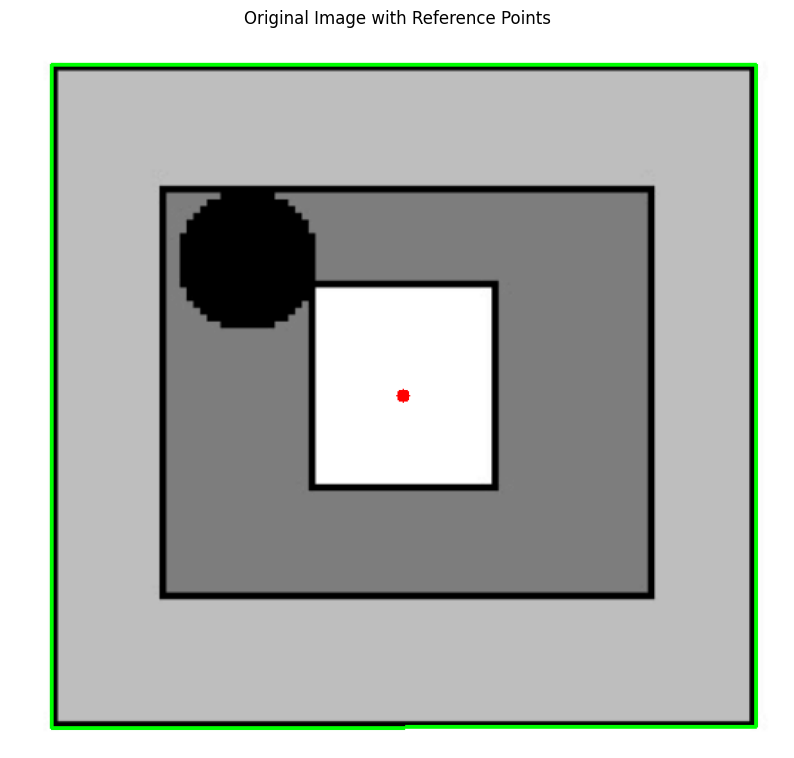

Output saved to: /home/vikram/Aule_space/Square_view.png
Detected square centers: [(306, 283)]


In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_squares_and_centers(image_path, output_path):
    """
    Detect squares in an image and calculate their centers.
    
    Parameters:
    - image_path: Path to the input image.
    - output_path: Path to save the output image with squares and centers marked.
    """
    # Load the image
    image = cv2.imread(image_path)
    original = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Preprocess the image
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Loop through contours to identify squares
    squares = []
    centers = []
    for contour in contours:
        # Approximate the contour
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)

        # Check if the contour is a square
        if len(approx) == 4 and cv2.isContourConvex(approx):
            x, y, w, h = cv2.boundingRect(approx)
            aspect_ratio = float(w) / h

            if 0.9 <= aspect_ratio <= 1.1:  # Ensure it's close to a square
                squares.append(approx)

                # Calculate the center
                M = cv2.moments(approx)
                if M["m00"] != 0:  # Avoid division by zero
                    cx = int(M["m10"] / M["m00"])
                    cy = int(M["m01"] / M["m00"])
                    centers.append((cx, cy))
                else:
                    cx, cy = 0, 0

    # Draw squares and centers on the image
    for square, center in zip(squares, centers):
        cv2.drawContours(original, [square], -1, (0, 255, 0), 2)  # Draw square in green
        cv2.circle(original, center, 5, (0, 0, 255), -1)  # Mark center in red

    # Save and display the output
    # cv2.imwrite(output_path, original)
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Original Image with Reference Points')
    plt.show()
    print(f"Output saved to: {output_path}")
    print("Detected square centers:", centers)

# Example usage
input_image_path = '/home/vikram/Aule_space/Satellite_port.png'
output_image_path = '/home/vikram/Aule_space/Square_view.png'

find_squares_and_centers(input_image_path, output_image_path)


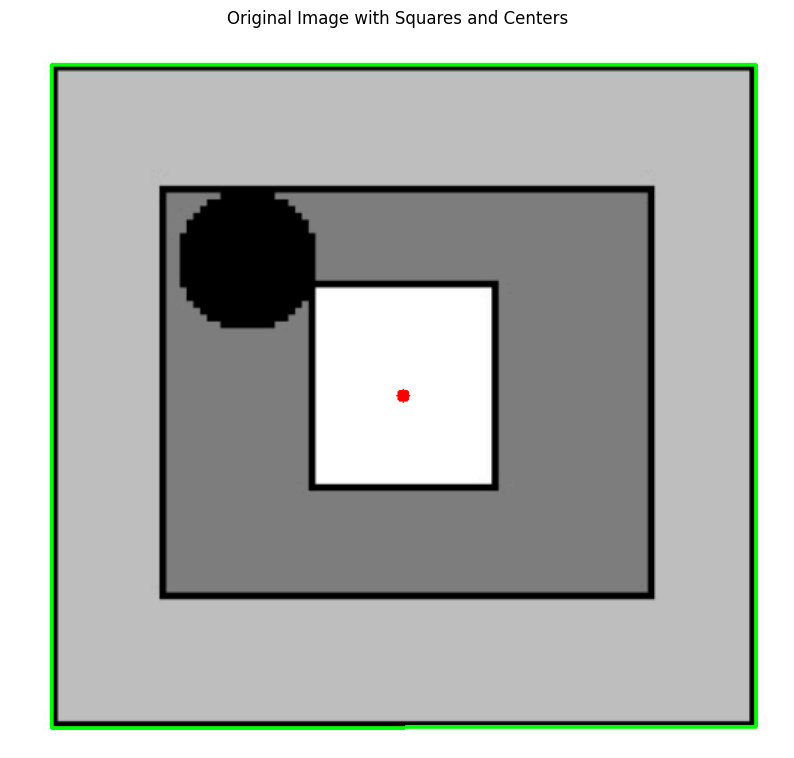

Output saved to: /home/vikram/Aule_space/Square_view.png
Detected square centers: [(306, 283)]
Pixel differences (center to right edge): [276]


In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_squares_and_centers_with_right_edge(image_path, output_path):
    """
    Detect squares in an image, calculate their centers, right edges, 
    and the pixel difference between the center and the right edge.

    Parameters:
    - image_path: Path to the input image.
    - output_path: Path to save the output image with squares and centers marked.
    """
    # Load the image
    image = cv2.imread(image_path)
    original = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Preprocess the image
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Loop through contours to identify squares
    squares = []
    centers = []
    pixel_differences = []
    for contour in contours:
        # Approximate the contour
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)

        # Check if the contour is a square
        if len(approx) == 4 and cv2.isContourConvex(approx):
            x, y, w, h = cv2.boundingRect(approx)
            aspect_ratio = float(w) / h

            if 0.9 <= aspect_ratio <= 1.1:  # Ensure it's close to a square
                squares.append(approx)

                # Calculate the center
                M = cv2.moments(approx)
                if M["m00"] != 0:  # Avoid division by zero
                    cx = int(M["m10"] / M["m00"])
                    cy = int(M["m01"] / M["m00"])
                    centers.append((cx, cy))

                    # Calculate the right edge
                    right_edge_x = x + w

                    # Calculate pixel difference
                    pixel_difference = right_edge_x - cx
                    pixel_differences.append(pixel_difference)
                else:
                    cx, cy = 0, 0

    # Draw squares and centers on the image
    for square, center in zip(squares, centers):
        cv2.drawContours(original, [square], -1, (0, 255, 0), 2)  # Draw square in green
        cv2.circle(original, center, 5, (0, 0, 255), -1)  # Mark center in red

    # Save and display the output
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Original Image with Squares and Centers')
    plt.show()

    # Print results
    print(f"Output saved to: {output_path}")
    print("Detected square centers:", centers)
    print("Pixel differences (center to right edge):", pixel_differences)

# Example usage
input_image_path = '/home/vikram/Aule_space/Satellite_port.png'
output_image_path = '/home/vikram/Aule_space/Square_view.png'

find_squares_and_centers_with_right_edge(input_image_path, output_image_path)


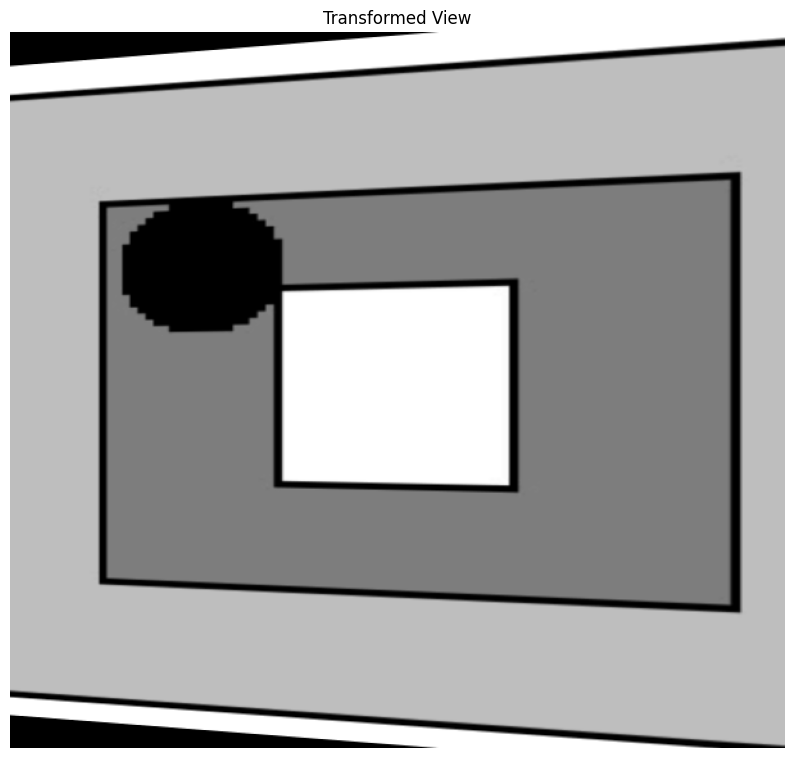

In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_homography_perspective(image_path, output_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Image not found.")
        return
    original = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Detect the outer square's corners
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    squares = []
    for contour in contours:
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        if len(approx) == 4 and cv2.isContourConvex(approx):
            x, y, w, h = cv2.boundingRect(approx)
            aspect_ratio = float(w) / h
            if 0.9 <= aspect_ratio <= 1.1:
                squares.append(approx)
    
    if not squares:
        print("No squares detected.")
        return
    
    # Assuming the largest square is the outer one
    largest_square = max(squares, key=lambda x: cv2.contourArea(x))
    
    # Order the corners (top-left, top-right, bottom-right, bottom-left)
    def order_corners(corners):
        corners = corners.reshape(4, 2)
        centroid = np.mean(corners, axis=0)
        diff = corners - centroid
        angles = np.arctan2(diff[:, 1], diff[:, 0])
        corners = corners[np.argsort(angles)]
        return np.array([corners[0], corners[1], corners[2], corners[3]], dtype=np.float32)
    
    src_pts = order_corners(largest_square)
    
    # Define destination points based on homography calculation for 22.5 degrees
    # These values are approximate; actual calculation requires camera parameters
    # The following shifts simulate a right-side perspective
    (tl, tr, br, bl) = src_pts
    width = np.linalg.norm(tr - tl)
    height = np.linalg.norm(bl - tl)
    
    # Perspective shift parameters (adjust these to control the effect)
    right_shift = 0.2 * width  # Shift right points to the right
    left_shift = -0.1 * width   # Shift left points to the left
    vertical_shift = 0.05 * height
    
    dst_pts = np.array([
        [tl[0] + left_shift, tl[1] + vertical_shift],   # Top-left
        [tr[0] + right_shift, tr[1] - vertical_shift],  # Top-right
        [br[0] + right_shift, br[1] + vertical_shift],  # Bottom-right
        [bl[0] + left_shift, bl[1] - vertical_shift]    # Bottom-left
    ], dtype=np.float32)
    
    # Compute homography matrix
    H, _ = cv2.findHomography(src_pts, dst_pts)
    
    # Apply homography
    height, width = image.shape[:2]
    warped = cv2.warpPerspective(original, H, (width, height))
    
    # Save and display the result
    cv2.imwrite(output_path, warped)
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Transformed View')
    plt.show()

# Example usage
input_image_path = '/home/vikram/Aule_space/Satellite_port.png'
output_image_path = '/home/vikram/Aule_space/Satellite_port_transformed.png'

apply_homography_perspective(input_image_path, output_image_path)

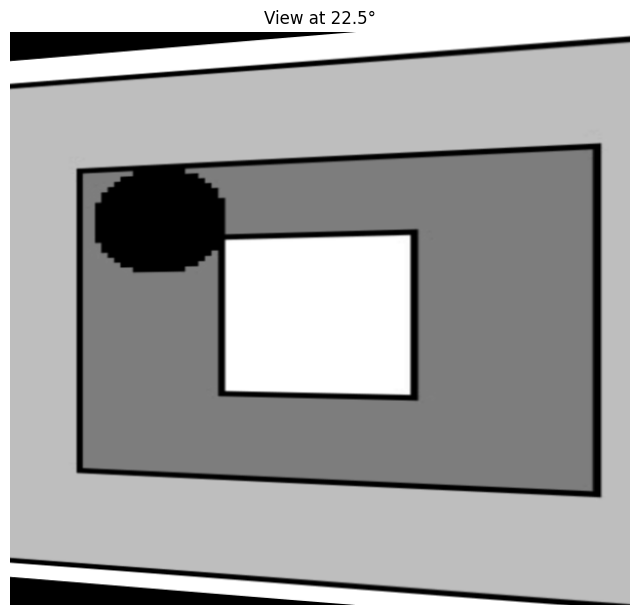

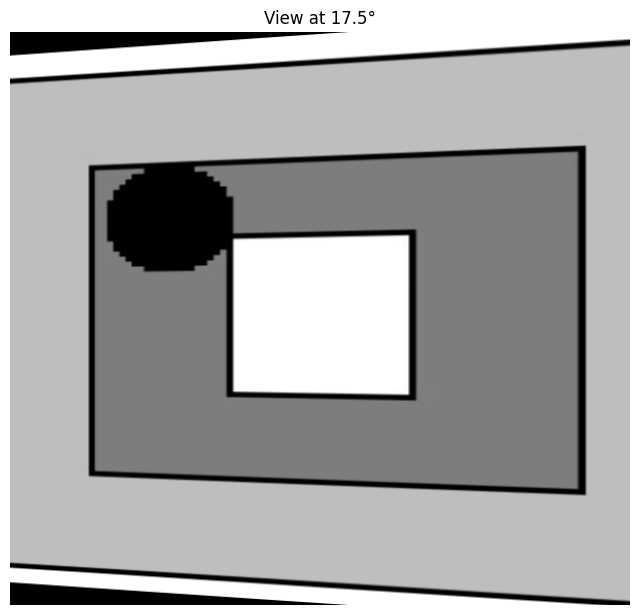

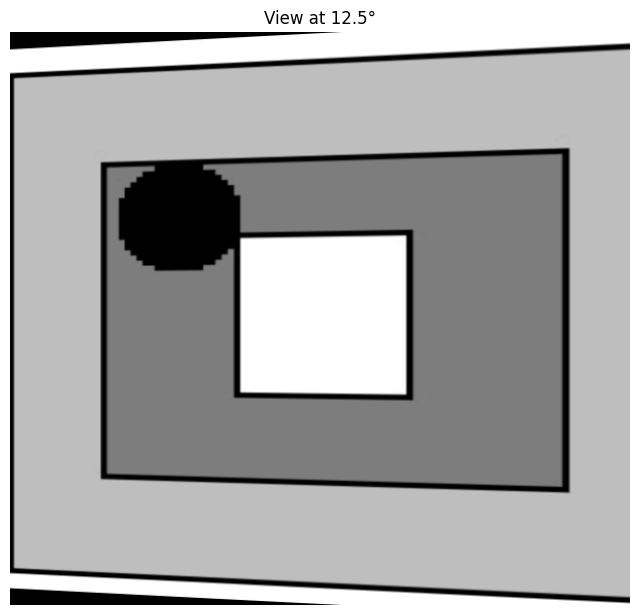

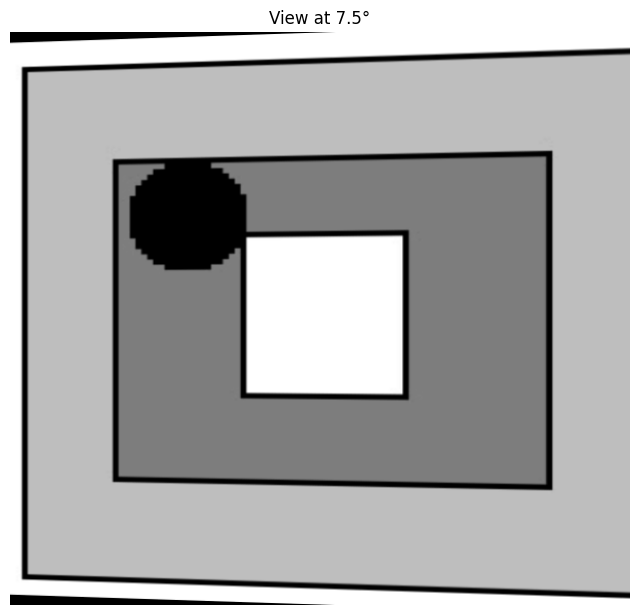

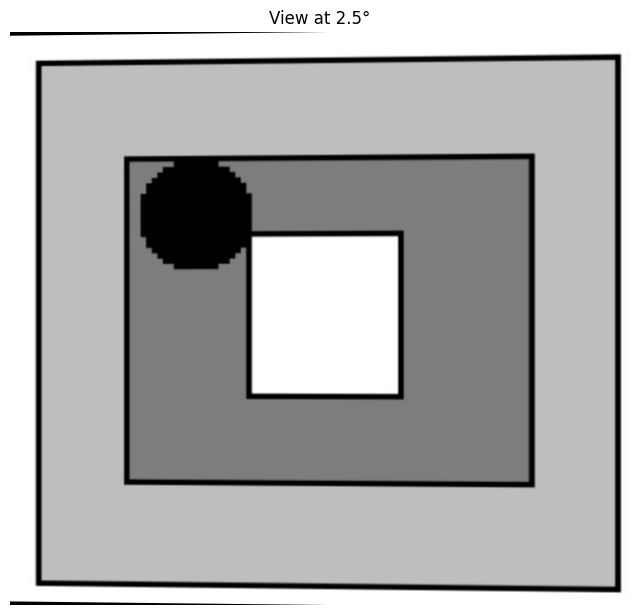

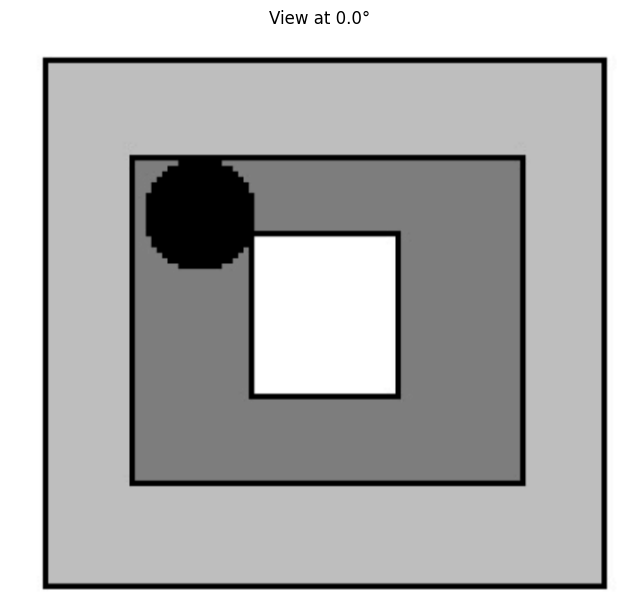

In [57]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def detect_outer_square(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Image not found.")
        return None
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    squares = []
    for contour in contours:
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        if len(approx) == 4 and cv2.isContourConvex(approx):
            x, y, w, h = cv2.boundingRect(approx)
            aspect_ratio = float(w) / h
            if 0.9 <= aspect_ratio <= 1.1:
                squares.append(approx)
    
    if not squares:
        print("No squares detected.")
        return None
    
    largest_square = max(squares, key=lambda x: cv2.contourArea(x))
    
    def order_corners(corners):
        corners = corners.reshape(4, 2)
        centroid = np.mean(corners, axis=0)
        diff = corners - centroid
        angles = np.arctan2(diff[:, 1], diff[:, 0])
        ordered = corners[np.argsort(angles)]
        return np.array([ordered[0], ordered[1], ordered[2], ordered[3]], dtype=np.float32)
    
    src_pts = order_corners(largest_square)
    return src_pts, image.shape

def generate_incremental_views(image_path, output_dir, angles):
    result = detect_outer_square(image_path)
    if result is None:
        return
    src_pts, (height, width, _) = result
    original = cv2.imread(image_path)
    
    os.makedirs(output_dir, exist_ok=True)
    
    for angle in angles:
        shift_ratio = angle / 22.5
        right_shift = shift_ratio * 0.2 * width
        left_shift = shift_ratio * (-0.1) * width
        vertical_shift = shift_ratio * 0.05 * height
        
        (tl, tr, br, bl) = src_pts
        dst_pts = np.array([
            [tl[0] + left_shift, tl[1] + vertical_shift],
            [tr[0] + right_shift, tr[1] - vertical_shift],
            [br[0] + right_shift, br[1] + vertical_shift],
            [bl[0] + left_shift, bl[1] - vertical_shift]
        ], dtype=np.float32)
        
        H, _ = cv2.findHomography(src_pts, dst_pts)
        warped = cv2.warpPerspective(original, H, (width, height))
        
        output_path = os.path.join(output_dir, f'angle_{angle:.1f}_degrees.png')
        cv2.imwrite(output_path, warped)
        
        plt.figure(figsize=(8, 8))
        plt.imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f'View at {angle:.1f}°')
        plt.show()

# Example usage
input_image_path = '/home/vikram/Aule_space/Satellite_port.png'
output_dir = '/home/vikram/Aule_space/incremental_views'
angles = [22.5, 17.5, 12.5, 7.5, 2.5, 0.0]

generate_incremental_views(input_image_path, output_dir, angles)